## Task 3: Customer Segmentation

In [1]:
# Import Libraries
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import metrics
from kmodes.kprototypes import KPrototypes
import gower
from sklearn.pipeline import make_pipeline

warnings.simplefilter('ignore')

In [2]:
def wrangle (filepath):
    df = pd.read_csv(filepath).set_index('customerID')
    
    # Remove duplicate rows
    df = df.drop_duplicates()
    
    # Fill missing values in 'TotalCharges' with the mean
    df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

    return df

In [3]:
df = wrangle(r"C:\Users\GREAT\Downloads\Telco_Customer_Churn_Dataset  (3) - Telco_Customer_Churn_Dataset  (3).csv")
print(df.shape)
df.head()

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### SPLIT

### Customer Segmentation using KMeans

In [15]:
# Select relevant columns
X_enc = df[['tenure', 'MonthlyCharges', 'Contract']].copy()

# Encode categorical variable
le = LabelEncoder()
X_enc['Contract'] = le.fit_transform(X_enc['Contract'])

# Scale numeric variables
scaler = StandardScaler()
X_enc[['tenure', 'MonthlyCharges']] = scaler.fit_transform(X_enc[['tenure', 'MonthlyCharges']])

# Display first few rows
X_enc.head()

,tenure,MonthlyCharges,Contract
customerID,,,
7590-VHVEG,-1.282728,-1.164135,0
5575-GNVDE,0.062387,-0.262811,1
3668-QPYBK,-1.241967,-0.365914,0
7795-CFOCW,0.510759,-0.750058,1
9237-HQITU,-1.241967,0.194503,0


In [16]:
# Determine optimal number of clusters
n_clusters = range(2,15)
inertia_errors = []
silhouette_scores = []

# Iterate through each k to fit KMeans 
for k in n_clusters:
    # Build model
    model_1 = KMeans(n_clusters = k, random_state = 42)
    # Train model
    model_1.fit(X_enc)
    # Calculate inertia and silhouette score for each k. Append to the empty lists above
    inertia_errors.append(model_1.inertia_)
    silhouette_scores.append(metrics.silhouette_score(X_enc,model_1.labels_))

print(inertia_errors)
print(silhouette_scores)

[10935.096942907187, 7752.867714582909, 5304.881397639939, 4274.887045280221, 3666.8924229875106, 3201.5367511695313, 2850.638439830373, 2572.3326625839095, 2380.7884625105135, 2151.2968760919453, 1897.8352735915357, 1764.1841163868685, 1673.2258021016587]
[0.3985726553102865, 0.3715457878252249, 0.4002489016919065, 0.3952500131095924, 0.3972175900899366, 0.413401016360367, 0.3878314203166457, 0.3855339276870889, 0.37193544468176226, 0.38500673924729384, 0.4043232070908953, 0.41081488339487743, 0.4101500205174221]


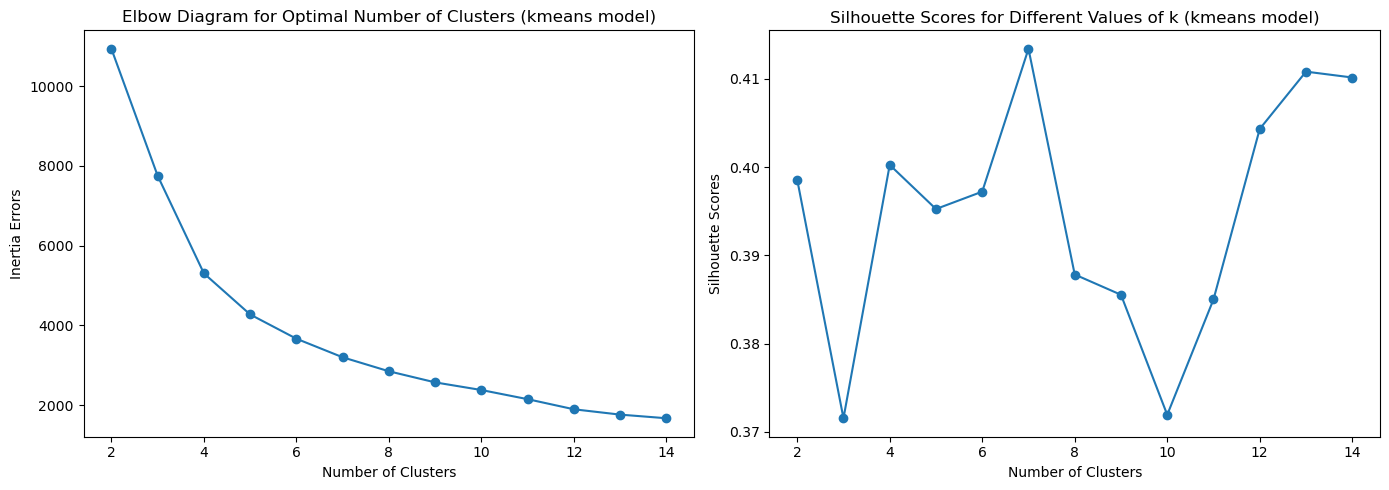

In [17]:
# Plot inertia errors by n_clusters
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
plt.plot(n_clusters,inertia_errors, marker = 'o')
plt.title('Elbow Diagram for Optimal Number of Clusters (kmeans model)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Errors')

# Plot Silhouette Scores by n_clusters
plt.subplot(1,2,2)
plt.plot(n_clusters,silhouette_scores, marker = 'o')
plt.title('Silhouette Scores for Different Values of k (kmeans model)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')

plt.tight_layout()

In [23]:
# Build and train final model 
final_model_1 = KMeans(n_clusters = 4, random_state = 42)
final_model_1.fit(X_enc)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [24]:
# Retrieve cluster labels from the final KMeans model and add them as a new column in the DataFrame
labels = final_model_1.labels_
df['Cluster_km'] = labels

df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster_km
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3


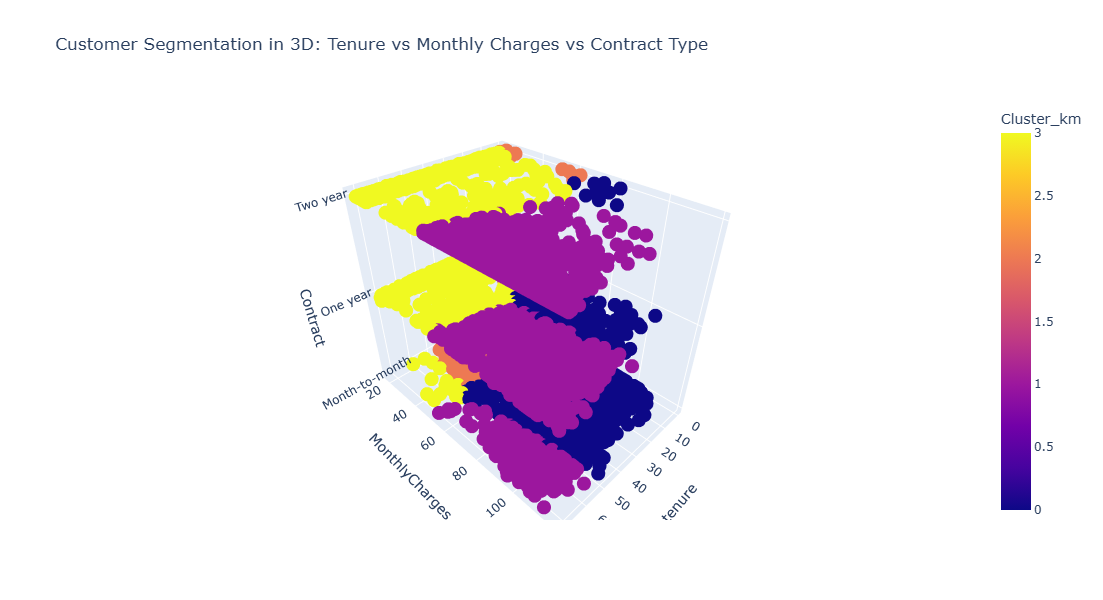

In [27]:
# Create a 3D scatter plot of customers showing Tenure, Monthly Charges, and Contract Type, colored by KMeans cluster
fig = px.scatter_3d(
    data_frame = df,
    x = 'tenure',
    y = 'MonthlyCharges',
    z = 'Contract',
    color = 'Cluster_km',
    title = 'Customer Segmentation in 3D: Tenure vs Monthly Charges vs Contract Type',
    width = 1000,
    height = 600  
)
fig.show()

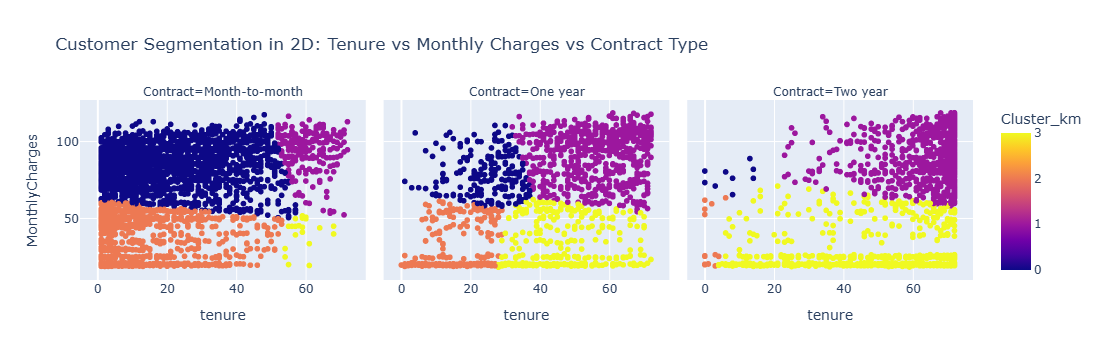

In [28]:
# Create a 2D scatter plot of customers showing Tenure vs Monthly Charges, faceted by Contract Type and colored by KMeans clusters
px.scatter(
    df,
    x = 'tenure',
    y = 'MonthlyCharges',
    color = 'Cluster_km',
    facet_col ='Contract',     
    title = "Customer Segmentation in 2D: Tenure vs Monthly Charges vs Contract Type"
)

In [30]:
Churn_rate_per_cluster = pd.DataFrame(
    df['Cluster_km']
    .groupby(df['Churn'])
    .value_counts(normalize = True)
    .rename('Churn Rate (%)')*100
)
Churn_rate_per_cluster

Churn Rate (%)
Churn Cluster_km                
No    1                30.073586
      0                24.283501
      2                24.109218
      3                21.533695
Yes   0                64.081852
      2                23.801831
      1                10.554658
      3                 1.561659

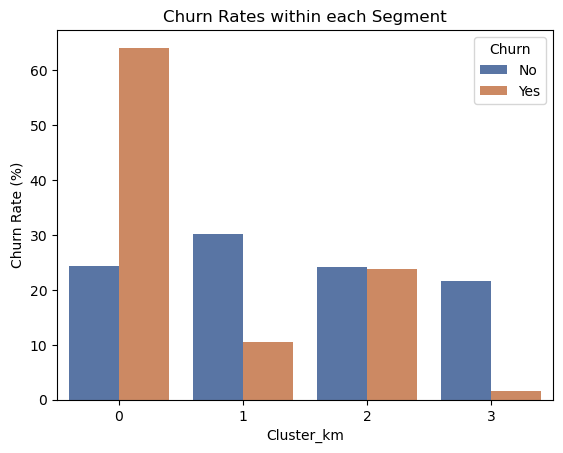

In [31]:
sns.barplot(
    data = Churn_rate_per_cluster,
    x = 'Cluster_km',
    y = 'Churn Rate (%)',
    hue = 'Churn',
    palette = 'deep'
)
plt.title('Churn Rates within each Segment');

In [33]:
# Convert Churn to numeric: Yes = 1, No = 0
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Calculate churn rate per cluster
Churn_rate_per_cluster = df.groupby('Cluster_km')['Churn_numeric'].mean().reset_index()
Churn_rate_per_cluster.rename(columns={'Churn_numeric': 'Churn_Rate (%)'}, inplace=True)

# Convert to percentage
Churn_rate_per_cluster['Churn_Rate (%)'] = Churn_rate_per_cluster['Churn_Rate (%)'] * 100

Churn_rate_per_cluster

,Cluster_km,Churn_Rate (%)
0,0,48.690671
1,1,11.206404
2,2,26.200356
3,3,2.541630


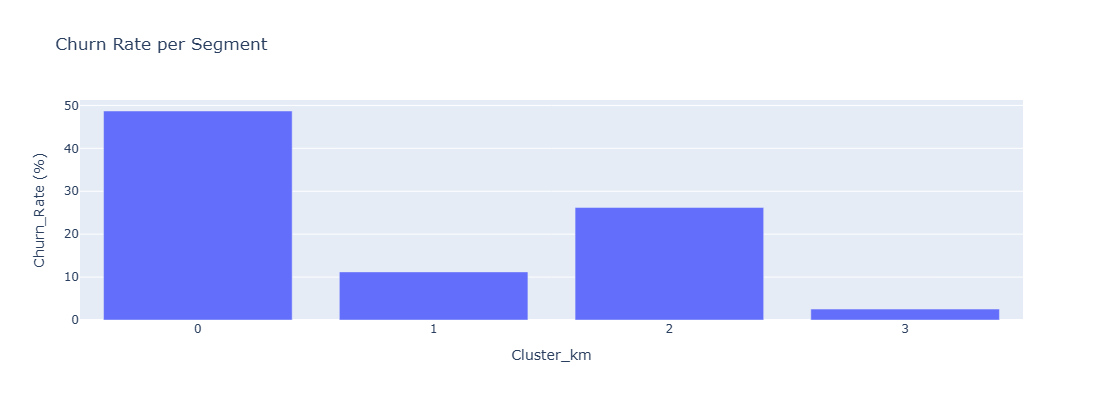

In [14]:
fig = px.bar(
    data_frame = Churn_rate_per_cluster,
    x = 'Cluster_km',
    y = 'Churn_Rate (%)',
    title = 'Churn Rate per Segment',
    width = 800,
    height = 400
)
fig.update_xaxes(type = 'category')

In [98]:
# Determine high value customers who are at risk of churning
km_potential_high_value_risk = df[
                            (df['MonthlyCharges']>df['MonthlyCharges'].quantile(0.75)) & # High value customers
                            (df['TotalCharges']>df['TotalCharges'].quantile(0.75)) & # High value customers
                            (df['Cluster_km']==0) &  # Cluster with the highest churn rate
                            (df['Churn']=='No')   # Customers who are yet to churn
                        ]
pd.set_option('display.max_rows', None)
km_potential_high_value_risk[['MonthlyCharges', 'tenure']]

,MonthlyCharges,tenure
customerID,,
8012-SOUDQ,90.25,43
0434-CSFON,100.50,47
9919-YLNNG,103.80,42
5712-AHQNN,91.65,43
3316-UWXUY,93.50,50
8782-LKFPK,90.40,44
3951-NJCVI,95.05,42
5628-RKIFK,101.55,49
2267-FPIMA,94.40,50


### Customer segmentation using K-Prototype

In [48]:
X = df[['tenure', 'MonthlyCharges', 'Contract']].copy()
num_cols = ['tenure', 'MonthlyCharges']
cat_cols = ['Contract']

# Scale numeric columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Combine
X = X[num_cols + cat_cols]

# Convert data frame to an array
X_matrix = X.to_numpy()

# Define categorical indices
cat_idx = [2]

In [53]:
# Get Optimal number of Clusters
n_clusters = range(2, 7) 

# Compute gower distance for silhouette score
gower_dist = gower.gower_matrix(X_matrix)

# Empty lists to store evaluation metrics
costs = []
kp_silhouette_scores = []
 
# Iterate through each k to fit K-Prototypes and evaluate
for k in n_clusters:
    # Build model
    kproto = KPrototypes(n_clusters = k, init = 'Huang', random_state = 42)
    # fit model
    kproto.fit_predict(X_matrix, categorical = cat_idx)
    # Record cost and silhouette score
    costs.append(kproto.cost_)
    kp_silhouette_scores.append(metrics.silhouette_score(gower_dist, kproto.labels_, metric="precomputed"))

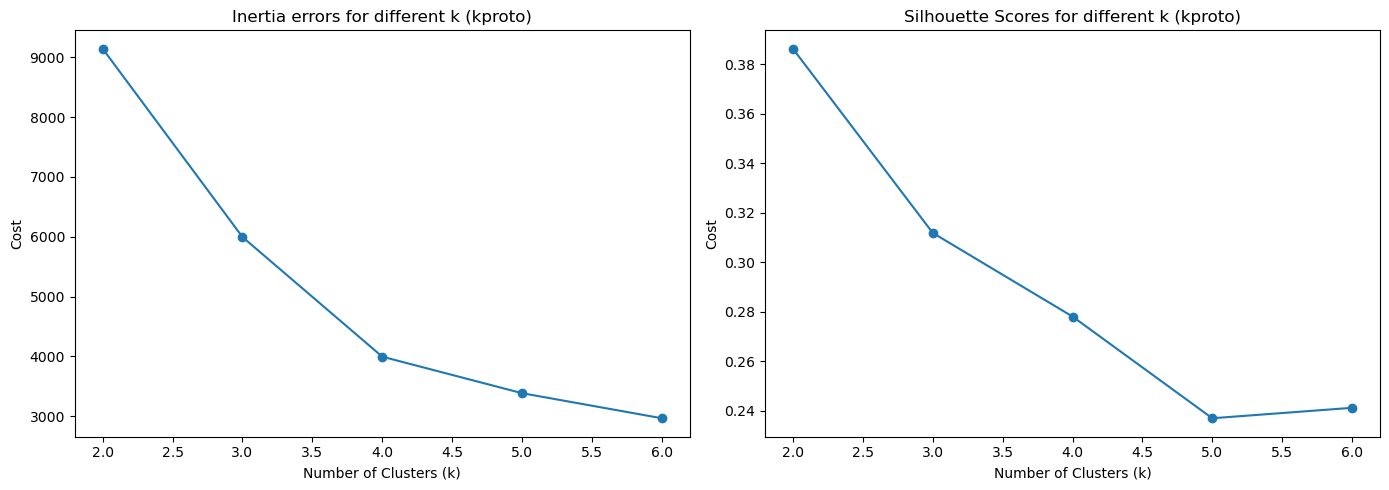

In [54]:
# Plot K-Prototypes evaluation metrics: cost and silhouette score for different numbers of clusters
plt.figure(figsize=(14,5))

# Plot cost vs number of clusters
plt.subplot(1,2,1)
plt.plot(n_clusters,costs, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Inertia errors for different k (kproto)')

# Plot Silhouette score vs number of clusters
plt.subplot(1,2,2)
plt.plot(n_clusters,kp_silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Silhouette Scores for different k (kproto)')

plt.tight_layout()

In [55]:
# Build and fit model
kproto = KPrototypes(n_clusters = 4, init = 'Huang', random_state = 42)
kproto.fit_predict(X_matrix, categorical = cat_idx)

array([1, 2, 1, ..., 1, 2, 0], dtype=uint16)

In [56]:
df['Clusters_kp'] = kproto.labels_
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster_km,Churn_numeric,Clusters_kp
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,2,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,No,3,0,2


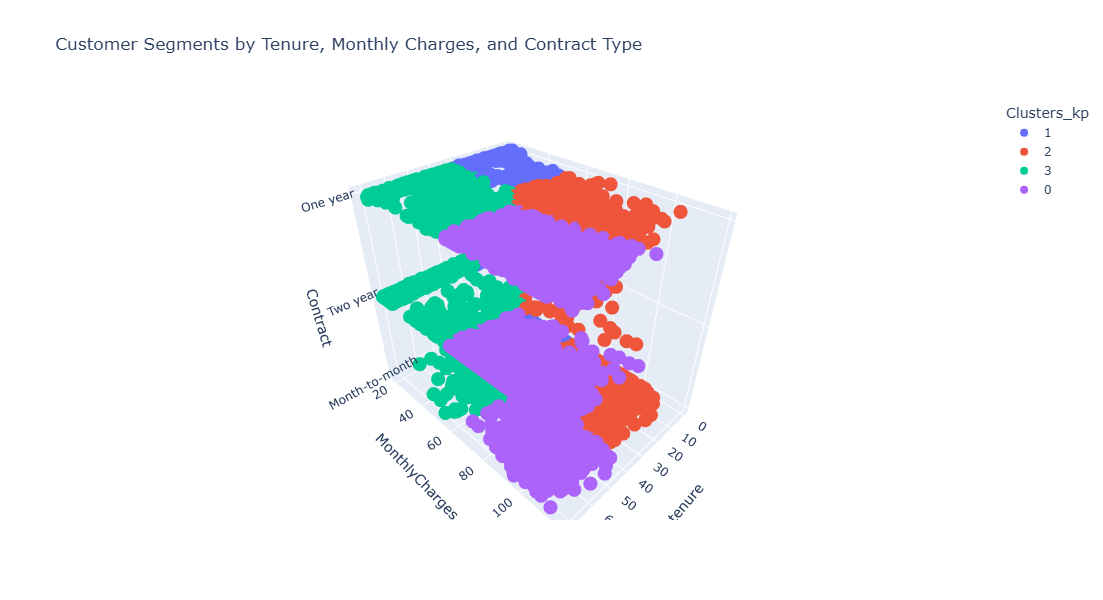

In [57]:
px.scatter_3d(
    data_frame = df,
    x = 'tenure',
    y = 'MonthlyCharges',
    z = 'Contract',
    color = 'Clusters_kp',
    title = 'Customer Segments by Tenure, Monthly Charges, and Contract Type',
    width = 1000,
    height = 600
)

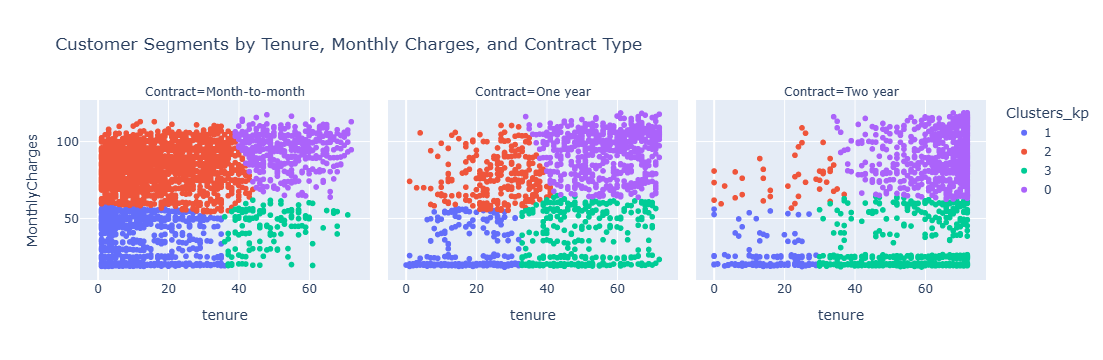

In [59]:
# Scatter plot showing Clusters by Tenure, monthly Charges and Contract type
px.scatter(
    data_frame=df,
    x='tenure',
    y='MonthlyCharges',
    color='Clusters_kp',
    facet_col='Contract', 
    title='Customer Segments by Tenure, Monthly Charges, and Contract Type'
)

### Churn rates within Cluster Segments (kproto)

In [60]:
# Calculate churn rate per cluster
ChurnRate_per_kpcluster = df.groupby('Clusters_kp')['Churn_numeric'].mean().reset_index()
ChurnRate_per_kpcluster.rename(columns={'Churn_numeric': 'Churn_Rate (%)'}, inplace=True)

# Convert to percentage
ChurnRate_per_kpcluster['Churn_Rate (%)'] = ChurnRate_per_kpcluster['Churn_Rate (%)'] * 100

ChurnRate_per_kpcluster

,Clusters_kp,Churn_Rate (%)
0,0,14.402619
1,1,24.277457
2,2,48.213517
3,3,4.669604


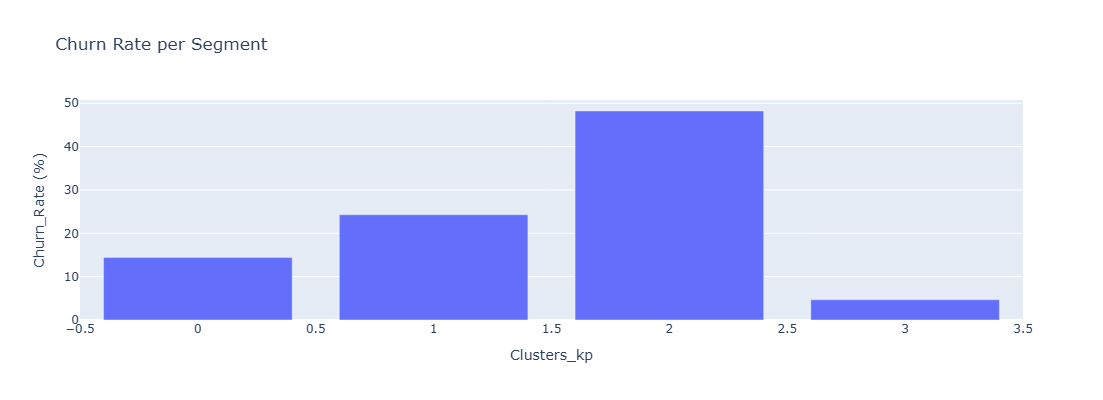

In [61]:
# Churn rate per segment
px.bar(
    data_frame = ChurnRate_per_kpcluster,
    x = 'Clusters_kp',
    y = 'Churn_Rate (%)',
    title = 'Churn Rate per Segment',
    width = 800,
    height = 400
)

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80
Cluster_km,7021.0,1.217206,1.091521,0.00,0.00,1.00,2.0,3.00
Churn_numeric,7021.0,0.264492,0.441094,0.00,0.00,0.00,1.0,1.00
Clusters_kp,7021.0,1.393106,1.041245,0.00,0.00,1.00,2.0,3.00


In [63]:
# At risk Customers
potential_high_value_risk = df[
                            (df['MonthlyCharges']>df['MonthlyCharges'].quantile(0.75)) & # High value customers
                            (df['TotalCharges']>df['TotalCharges'].quantile(0.75)) & # High value customers
                            (df['Clusters_kp']==2) &  # Cluster whith the highest churn rate
                            (df['Churn']=='No') # Customers who are yet to churn
                        ]

potential_high_value_risk[['MonthlyCharges', 'TotalCharges', 'tenure']]

,MonthlyCharges,TotalCharges,tenure
customerID,,,
2439-LYPMQ,102.60,4009.20,38
8378-LKJAF,101.15,3956.70,38
1666-JXLKU,100.05,3810.55,37
0420-HLGXF,99.75,4036.00,39
0147-ESWWR,101.25,3949.15,39
2832-KJCRD,103.65,3988.50,38
